# Global Shark Attack Incidents Data Analysis

Using the data set in <https://www.kaggle.com/teajay/global-shark-attacks/> (Version 7)

After cleaning and analyzing the data, we want to answer the following questions:

* Attacks per year 1900+ (Total, Fatal, Non Fatal) ?


* Relation of provoked and unprovoked attacks/ fatal or non fatal (1900+)


* Relation of Man or Woman in Total attacks (1900+) 


## Import, cleaning and export data set

### Import libraries and data set's

In [333]:
import pandas as pd
import numpy as np
import requests

In [334]:
#read dataframe and create a backup
df = pd.read_csv('./data/attacks.csv', sep = ',', encoding='latin-1')
df_backup = df.copy()

### Clean data frame

#### work with column names

In [335]:
columns_name = df.columns
# make remove spaces before and after and put all in lower case
columns_name = [item.strip().lower() for item in columns_name]
# replace spaces for underline
columns_name = [item.replace(' ', '_') for item in columns_name]
df.columns = columns_name

In [336]:
df.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

#### Work with duplicate row's /columns with missing values

In [337]:
#drop duplicate rows
df.drop_duplicates(subset =df.columns, inplace = True)
df.shape

(6312, 24)

In [338]:
#count NaN in each row
df['count_missing'] = df.isnull().sum(axis=1)
#using a mask to eliminate rows with 20 missing values or more
mask = df['count_missing'] < 20
df = df.loc[mask,:]
#drop column use before
df.drop(labels='count_missing', axis=1, inplace=True)
df.shape

(6302, 24)

In [339]:
#Count missing values in Columns
df.isnull().sum()

case_number                  1
date                         0
year                         2
type                         4
country                     50
area                       455
location                   540
activity                   544
name                       210
sex                        565
age                       2831
injury                      28
fatal_(y/n)                539
time                      3354
species                   2838
investigator_or_source      17
pdf                          0
href_formula                 1
href                         0
case_number.1                0
case_number.2                0
original_order               0
unnamed:_22               6301
unnamed:_23               6300
dtype: int64

In [340]:
#look for row's not in column's Unnamed: 22
df.loc[~df['unnamed:_22'].isnull(), :]

,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,...,NaN,R. Collier,2006.05.27-Desmond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.27,2006.05.27,4825.0,stopped here,NaN


In [341]:
#look for row's not in column's Unnamed: 23
df.loc[~df['unnamed:_23'].isnull(), :]

,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,...,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,NaN,Teramo
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,...,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,NaN,change filename


In [342]:
#drop columns Unnamed
df.drop(labels=['unnamed:_22','unnamed:_23'], axis=1, inplace=True)

#### Work with the columns href and href_formula

In [343]:
#look for equals values
(df['href'] == df['href_formula']).value_counts()

True     6242
False      60
dtype: int64

In [344]:
#show the values were href is different than href_formula
df.loc[~(df['href'] == df['href_formula']), ['href', 'href_formula']]

,href,href_formula
50,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
96,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
131,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
133,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
141,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
168,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
234,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
241,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
276,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
324,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [345]:
# in the most of cases one of column have a link, with a funcion try to see if one column have a good link

def clean_href(lst):
    """
    This funcion check if two values of list is equals, if not check if one of the values have a link if response is ok
    * In http a status code OK for get request is 200
    """
    x = lst[0]
    y = lst[1]
    try: 
        if x == y:
            return x
        else:
            x_code = requests.get(x, verify=True).status_code
            if x_code == 200:
                return x
            else:
                y_code = requests.get(y, verify=True).status_code
                if y_code == 200:
                    return y
                else:
                    return False
    except:
        return False
# make new column with a list of values from the column href and href_formula
df['href_new'] = list(zip(df['href'], df['href_formula']))
# apply the function clean_href to the new column
df['href_new'] = df['href_new'].apply(clean_href)
df['href_new']

0       http://sharkattackfile.net/spreadsheets/pdf_di...
1       http://sharkattackfile.net/spreadsheets/pdf_di...
2       http://sharkattackfile.net/spreadsheets/pdf_di...
3       http://sharkattackfile.net/spreadsheets/pdf_di...
4       http://sharkattackfile.net/spreadsheets/pdf_di...
                              ...                        
6297    http://sharkattackfile.net/spreadsheets/pdf_di...
6298    http://sharkattackfile.net/spreadsheets/pdf_di...
6299    http://sharkattackfile.net/spreadsheets/pdf_di...
6300    http://sharkattackfile.net/spreadsheets/pdf_di...
6301    http://sharkattackfile.net/spreadsheets/pdf_di...
Name: href_new, Length: 6302, dtype: object

In [346]:
#drop the columns href and href_formula from the df
df = df.drop(['href','href_formula'], axis=1)
df.head()

,case_number,date,year,type,country,area,location,activity,name,sex,...,injury,fatal_(y/n),time,species,investigator_or_source,pdf,case_number.1,case_number.2,original_order,href_new
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,2018.06.25,2018.06.25,6303.0,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,2018.06.18,2018.06.18,6302.0,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,2018.06.09,2018.06.09,6301.0,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,2018.06.08,2018.06.08,6300.0,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,2018.06.04,2018.06.04,6299.0,http://sharkattackfile.net/spreadsheets/pdf_di...


#### Work with 'Fatal (Y/N)' column

In [347]:
df['fatal_(y/n)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [348]:
#remove spaces before and after
df['fatal_(y/n)'] = df['fatal_(y/n)'].str.strip()
#lower all strings
df['fatal_(y/n)'] = df['fatal_(y/n)'].str.lower()
df['fatal_(y/n)'].unique()

array(['n', 'y', nan, 'm', 'unknown', '2017'], dtype=object)

In [349]:
#group other responses in missing value
df['fatal_(y/n)'] = df['fatal_(y/n)'].apply(lambda x: np.nan if x not in ['y','n'] else x)
df['fatal_(y/n)'].unique()

array(['n', 'y', nan], dtype=object)

#### Work with type column

In [350]:
df['type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [351]:
# put all dates in lower case
df["type"] = df["type"].str.lower()
# remove spaces before and after
df["type"] = df["type"].str.strip()
# classify as unprovoked any boating related
df["type"] = df["type"].apply(lambda x: "unprovoked" if x in ["boating", "sea disaster", "boat", "boatomg"] else x)
# set as NaN other types if not provoked or unprovoked
df["type"] = df["type"].apply(lambda x: np.nan if x not in ["provoked", "unprovoked"] else x)

df["type"].value_counts(dropna=False)

unprovoked    5175
provoked       574
NaN            553
Name: type, dtype: int64

#### Work with 'Sex' column

In [352]:
df['sex'].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [353]:
#remove spaces before and after
df['sex'] = df['sex'].str.strip()
#lower all strings
df['sex'] = df['sex'].str.lower()
df['sex'].unique()

array(['f', 'm', nan, 'lli', 'n', '.'], dtype=object)

In [354]:
#group other responses in missing value
df['sex'] = df['sex'].apply(lambda x: np.nan if x not in ['f','m'] else x)
df['sex'].unique()

array(['f', 'm', nan], dtype=object)

### Exporting data frame

In [355]:
df.to_csv('./data/df.csv',index=False)

## Answer the questions

### Attacks per year 1900+ (Total, Fatal, Non Fatal) ?

#### Create a data frame with the values to answer the question

In [356]:
# create data frame only with columns we want, with drop the other columns we don't need to this analyse
df_answer_1 = df[['year', 'fatal_(y/n)']]
# drop the lines with na
df_answer_1 = df_answer_1.dropna()
#filter year to 1900 +
df_answer_1 = df_answer_1.loc[df_answer_1['year'] >= 1900, :]
# create two columns fatals e non_fatals to sum after
df_answer_1['fatals'] = np.where(df_answer_1['fatal_(y/n)'] == 'y', True, False)
df_answer_1['non_fatals'] = np.where(df_answer_1['fatal_(y/n)'] == 'n', True, False)
#drop the column original
df_answer_1.drop(labels='fatal_(y/n)', axis=1, inplace = True)
#group by year and sum year
df_answer_1 = df_answer_1.groupby(by='year', as_index = False).sum()
#creating column total, sum of fatals and non_fatals
df_answer_1['Total'] = df_answer_1['fatals'] + df_answer_1['non_fatals'] 
#convert column year to int
df_answer_1['year'] =df_answer_1.astype(int)

#### Exporting data frame

In [357]:
df_answer_1.to_csv('./data/df_answer_1.csv', index=False)

#### Table of result's

In [358]:
pd.set_option('display.max_rows', 119)
df_answer_1

,year,fatals,non_fatals,Total
0,1900,3.0,7.0,10.0
1,1901,3.0,4.0,7.0
2,1902,5.0,8.0,13.0
3,1903,8.0,2.0,10.0
4,1904,10.0,3.0,13.0
5,1905,6.0,6.0,12.0
6,1906,11.0,7.0,18.0
7,1907,12.0,8.0,20.0
8,1908,10.0,1.0,11.0
9,1909,8.0,7.0,15.0


#### Plot result's

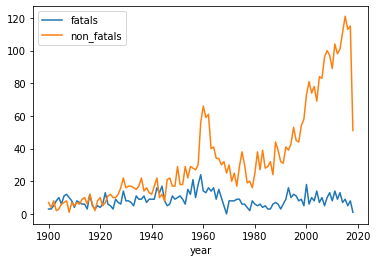

In [359]:
df_answer_1.plot(x ='year', y=['fatals','non_fatals'])

### Relation of provoked and unprovoked attacks/ fatal or non fatal (1900+)

#### Create a data frame with we need to answer the question

In [360]:
# create data frame only with columns we want, with drop the other columns we don't need to this analyse
df_answer_2 = df[['year', 'fatal_(y/n)', 'type']]
# drop the lines with na
df_answer_2 = df_answer_2.dropna()
#filter year to 1900 +
df_answer_2 = df_answer_2.loc[df_answer_2['year'] >= 1900, :]
# create four columns (fatals_provoked), (fatals_unprovoked), (non_fatals_provoked) and (non_fatals_unprovoked) to sum after
df_answer_2['fatals_provoked'] = np.where((df_answer_2['fatal_(y/n)'] == 'y') & (df_answer_2['type'] == 'provoked'), True, False)
df_answer_2['fatals_unprovoked'] = np.where((df_answer_2['fatal_(y/n)'] == 'y') & (df_answer_2['type'] == 'unprovoked'), True, False)
df_answer_2['non_fatals_provoked'] = np.where((df_answer_2['fatal_(y/n)'] == 'n') & (df_answer_2['type'] == 'provoked'), True, False)
df_answer_2['non_fatals_unprovoked'] = np.where((df_answer_2['fatal_(y/n)'] == 'n') & (df_answer_2['type'] == 'unprovoked'), True, False)

In [361]:
df_answer_2.to_csv('./data/df_answer_2.csv', index=False)
#drop the column original
df_answer_2.drop(labels=['fatal_(y/n)','year','type'] , axis=1, inplace = True)

#### Answer with the values 

In [362]:
#the answer with the sum per category
total = total.sort_values()
total

f     600
m    4458
Name: sex, dtype: int64

In [363]:
#normalize the answer 
total_perc = total.apply(lambda x: 100*x/total.sum())
total_perc = total_perc.sort_values()
total_perc

f    11.862396
m    88.137604
Name: sex, dtype: float64

#### Plot the answer

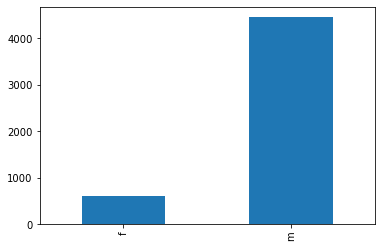

In [364]:
total.plot(kind='bar')

### Relation of Man or Woman in Total attacks (1900+)

#### Create a data frame with we need to answer the question

In [366]:
# create data frame only with columns we want, with drop the other columns we don't need to this analyse
df_answer_3 = df[['year', 'sex']]
# drop the lines with na
df_answer_3 = df_answer_3.dropna()
#filter year to 1900 +
df_answer_3 = df_answer_3.loc[df_answer_3['year'] >= 1900, :]

#### Exporting data frame

In [367]:
df_answer_3.to_csv('./data/df_answer_3.csv', index=False)
#drop the column we don't need
df_answer_3.drop(labels='year', axis=1, inplace = True)

#### Answer with the values 

In [368]:
total = df_answer_3['sex'].value_counts()
total

m    4458
f     600
Name: sex, dtype: int64

In [369]:
#normalize the answer 
total_perc = total.apply(lambda x: 100*x/total.sum())
total_perc = total_perc.sort_values()
total_perc

f    11.862396
m    88.137604
Name: sex, dtype: float64

#### Plot the answer

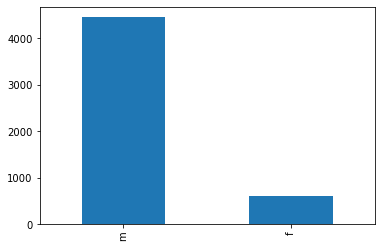

In [370]:
total.plot(kind='bar')